### EXERCISE : 7 

#### PART 1: K-MEANS CLUSTERING

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import scipy.io as sci

In [2]:
data=sci.loadmat("ex7data1.mat")

In [3]:
# It is unsupervised learning so it contains only the feature values
x=data["X"]


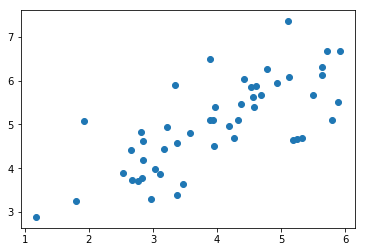

In [4]:
# plotting the data
plt.scatter(x[:,0],x[:,1])

#### Implementing k means clustering 

In [9]:
# Decide how many centroids need
# lets take there are 2 centroids
# random initaillization of centroidss
centro=10*np.random.random((2,2))

In [14]:
#Finding the closest Centroids
def Finding_clusters(centro,x):
    num_iters=10
    
    for _ in range(num_iters):
        clust=[[],[]]
        cost=0
        for e in x:
            d=[]
            #print(centro.shape)
            for i in centro:
                k=((e[0]-i[0])**2)+((e[1]-i[1])**2)
                d.append(k)
            cost=cost+min(d)
            if(d[0]<d[1]):
                clust[0].append(e)
                
            else:
                clust[1].append(e)
        # relocate the centroids by the mean of the allocated points
        clust[0]=np.array(clust[0])
        clust[1]=np.array(clust[1])
        c1=clust[0]
        c2=clust[1]
        c1=[c1[:,0].mean(),c1[:,1].mean()]
        c2=[c2[:,0].mean(),c2[:,1].mean()]
        
        centro[0,:]=c1
        centro[1,:]=c2
        
        
        
    return clust,centro,cost/(len(x))
        
    
    


In [15]:
clusts,cent,cost=Finding_clusters(centro,x)

#### Cost function obtainded by the clusters

In [16]:
print(cost)
    

0.8457564159745418


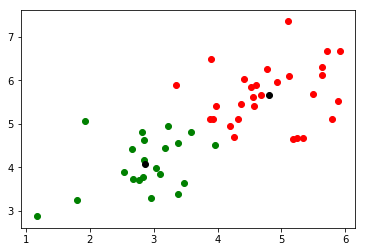

In [17]:
a=clusts[0]
b=clusts[1]
# one cluster
plt.scatter(a[:,0],a[:,1],color="red")
plt.scatter(b[:,0],b[:,1],color="green")
# plotting cluster centroids
plt.scatter(cent[0,0],cent[0,1],color="black")
plt.scatter(cent[1,0],cent[1,1],color="black")

- Here it forms two cluster one cluster is "red" and other cluster is "green"
- It has a cost is 1.29

### Example -2

In [18]:
data2=sci.loadmat("ex7data2.mat")
x1=data2["X"]

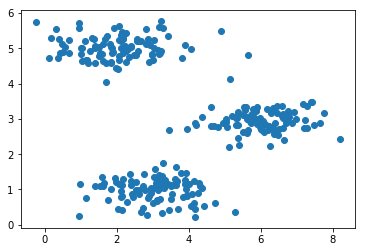

In [19]:
plt.scatter(x1[:,0],x1[:,1])

- By this data we can conclude that the there has three sets of data that means we can form 3 types of clusters

In [20]:
# here we having 3 clusters
i=np.random.randint(len(x1))
j=np.random.randint(len(x1))
k=np.random.randint(len(x1))
centri=np.array([x1[i],x1[j],x1[k]])


In [21]:
def Finding_clusters2(centro,x):
    num_iters=100
    
    for _ in range(num_iters):
        clust=[[],[],[]]
        cost=0
        for e in x:
            d=[]
            #print(centro.shape)
            for i in centro:
                k=((e[0]-i[0])**2)+((e[1]-i[1])**2)
                d.append(k)
            cost=cost+min(d)
            minn=d[0]
            k=0
            for i,j in enumerate(d):
                if(minn>=d[i]):
                    minn=d[i]
                    k=i
            clust[k].append(e)
                    
        # relocate the centroids by the mean of the allocated points
        clust[0]=np.array(clust[0])
        clust[1]=np.array(clust[1])
        clust[2]=np.array(clust[2])
        c1=clust[0]
        c2=clust[1]
        c3=clust[2]
        c1=[c1[:,0].mean(),c1[:,1].mean()]
        c2=[c2[:,0].mean(),c2[:,1].mean()]
        c3=[c3[:,0].mean(),c3[:,1].mean()]
        
        centro[0,:]=c1
        centro[1,:]=c2
        centro[2,:]=c3
        
        
        
    return clust,centro,cost/(len(x))

In [22]:
cluster,centr,cost=Finding_clusters2(centri,x1)

In [23]:
cost

0.8888617321830647

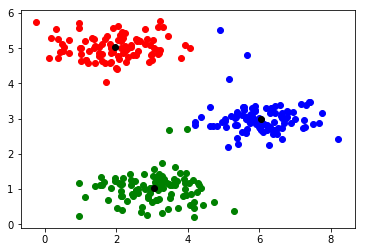

In [24]:
a=cluster[0]
b=cluster[1]
c=cluster[2]
# one cluster
plt.scatter(a[:,0],a[:,1],color="red")
plt.scatter(b[:,0],b[:,1],color="green")
plt.scatter(c[:,0],c[:,1],color="blue")
# plotting cluster centroids
plt.scatter(centr[0,0],centr[0,1],color="black")
plt.scatter(centr[1,0],centr[1,1],color="black")
plt.scatter(centr[2,0],centr[2,1],color="black")


- Here it forms three clusters
- three black points are consider to be the 3 cluster centroids

### Image Compression with the k-means algorithm

In [25]:
# reading image 
img=sci.loadmat("bird_small.mat")
img=img["A"]

(3456, 5184, 3)


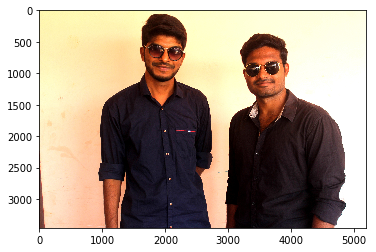

In [287]:
import cv2
im1=cv2.imread("sai.jpg")
im2=cv2.cvtColor(im1,cv2.COLOR_BGR2RGB)
plt.imshow(im2)
print(im2.shape)

In [289]:
3456*5184
im2=im2.reshape((17915904,3))

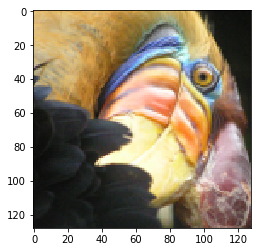

In [26]:
# showing an image for the compression by the k-means algorithm
plt.imshow(img)

In [290]:
# the shape of the image
print("the shape of the image is :-",img.shape)

the shape of the image is :- (16384, 3)


In [291]:
# now reshaping the picture
img=img.reshape((16384,3))

In [292]:
# now displaying the shape of the reshaped image
print("the reshaped image of the original shaped picture :-",img.shape)

the reshaped image of the original shaped picture :- (16384, 3)


- so the idea is to image is reduced to only to the hundreds of colors to only 16 colors
- so here we have to 16 colors for the image 
- that is we need to create 16 cluster centers

In [293]:
li=[]
for i in range(16):
    k=np.random.randint(len(img))
    li.append(img[k])
    
centriods=np.array(li)
centriods.shape

(16, 3)

In [294]:
def Finding_clusters3(centro,x):
    num_iters=5
    
    for _ in range(num_iters):
        clust=[[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
        index=[[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
        
        cost=0
        for j,e in enumerate(x):
            d=[]
            #print(centro.shape)
            for i in centro:
                k=((e[0]-i[0])**2)+((e[1]-i[1])**2)+((e[2]-i[2])**2)
                d.append(k)
            cost=cost+min(d)
            minn=d[0]
            k=0
            for i,jj in enumerate(d):
                if(minn>=jj):
                    minn=jj
                    k=i
            #print(e)
            
            #print(h)
            clust[k].append(e)
            index[k].append(j)
        
                    
        # relocate the centroids by the mean of the allocated points
        
        for i in range(centro.shape[0]):
            clust[i]=np.array(clust[i])
            
        #print(clust)  
        for i,a in enumerate(clust):
            a=np.array(a)
            if(a.shape[0]==0):
                continue
            #print(a.shape)
            b=[a[:,0].mean(),a[:,1].mean(),a[:,2].mean()]
            
            b=np.array(b)
            centro[i]=b    
        
    return clust,centro,cost/(len(x)),index

In [295]:
cl,ce,co,index=Finding_clusters3(centriods,im2)

/home/sai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in ubyte_scalars
  del sys.path[0]


KeyboardInterrupt: 

array([[189, 164, 132],
       [ 44,  43,  37],
       [245, 232, 195],
       [ 44,  43,  37],
       [235, 210, 171],
       [ 44,  43,  37],
       [171, 139, 100],
       [100,  82,  62],
       [ 44,  43,  37],
       [189, 164, 132],
       [200, 173, 132],
       [ 44,  43,  37],
       [100,  82,  62],
       [100,  82,  62],
       [ 44,  43,  37],
       [ 44,  43,  37]], dtype=uint8)

In [271]:
ce
x3=img

In [272]:
for i,j in zip(ce,index):
    for k in j:
        x3[k]=i
            
        

In [273]:
x3=x3.reshape((128,128,3))

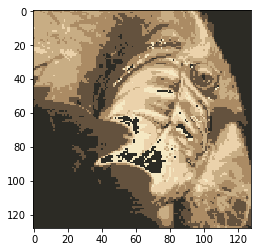

In [274]:
plt.imshow(x3)

In [275]:
plt.imsave("pic.png",x3)

In [276]:
co

0.0

### PART-2 : Principle Component Analysis

##### 2.1 Implementation of pca  for dataset-1
- It is a 2 dimensional data we have reduce it to the 1 dimenional data

In [2]:
# importing the libraries
import pandas as pd
import numpy as np
import scipy.io as sci
import matplotlib.pyplot as plt

In [3]:
data_p=sci.loadmat("ex7data1.mat")

In [4]:
p_x=data_p["X"]
# size of the p_x
print("the shape of the p_x is :",p_x.shape)
px=p_x

the shape of the p_x is : (50, 2)


- It has 2 features i.e 2 dimensional data we have to reduce it 1 dimensionals so it will have only 1 dimensions

### Procedure for pca
- step1: feature scaling
- step2: finding the covarience matrics
- step3: from the covarience matrics we have to find eigen values and eigen vectors
- step4: Now map the data to the new eigen vector

In [5]:
# feature scalling  was already done here
# finding the covarience matrices
Cm=(np.dot(p_x.T,p_x))/len(p_x)

In [6]:
# displaying the covarience matrices
print(Cm)

[[17.26276267 20.82286988]
 [20.82286988 26.05448259]]


In [7]:
# finding the eigen vectors and eigen values
eigen_val,eigen_vec=np.linalg.eig(Cm)
print(eigen_val)

[ 0.37681126 42.94043399]


In [8]:
eigen_vec

array([[-0.77670934, -0.6298592 ],
       [ 0.6298592 , -0.77670934]])

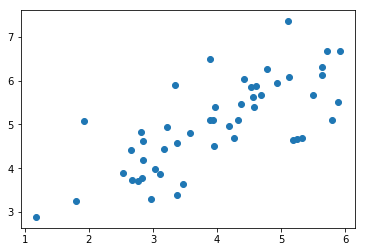

In [9]:
plt.scatter(p_x[:,0],p_x[:,1])

In [10]:
eigen_vec[0]

array([-0.77670934, -0.6298592 ])

In [11]:
e_val,e_vec=np.linalg.eigh(Cm)

In [12]:
# now we have to convert the 2 dimensional data to a 1 dimensional data so we need first vector and first eigen value
e_vec

array([[-0.77670934,  0.6298592 ],
       [ 0.6298592 ,  0.77670934]])

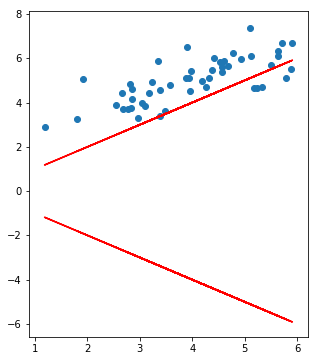

In [18]:
fig=plt.figure(figsize=(5,6))
x=p_x[:,0]
y=-0.70710678*x/-0.70710678
z=-0.70710678*x/0.70710678
plt.plot(x,y,color="red")
plt.plot(x,z,color="red")
plt.scatter(p_x[:,0],p_x[:,1])

In [16]:
# finding the new feature can be obtained by the projecting the all data points on to the eigen vector 
new_x=np.dot(p_x,eigen_vec[1].T)

In [17]:
new_x=new_x.reshape((50,1))

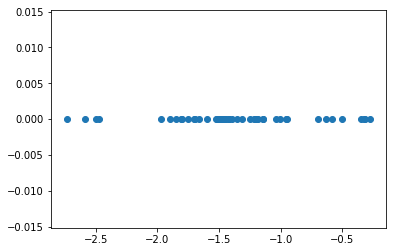

In [19]:
plt.scatter(new_x,np.zeros(len(new_x)))

In [21]:
new_x1=np.dot(p_x,eigen_vec[0].T)

In [22]:
new_x1=new_x1.reshape((50,1))

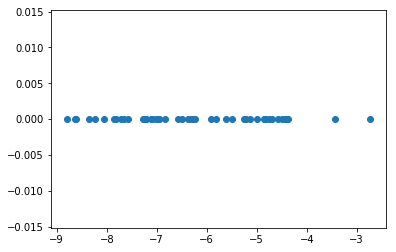

In [23]:
plt.scatter(new_x1,np.zeros(len(new_x1)))

In [24]:
pp=np.dot(new_x,eigen_vec[1].reshape((1,2)))

In [25]:
eigen_vec[0]=eigen_vec[0].reshape((1,2))

In [26]:
eigen_vec[0].shape

(2,)

#### Reconstructed the approximation of the data from the predicted data

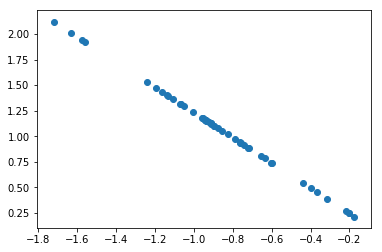

In [27]:
plt.scatter(pp[:,0],pp[:,1])

### PART:-2  Face Image Dataset

In [28]:
# load the face dataset
f_data=sci.loadmat("ex7faces.mat")

In [29]:
f_x=f_data["X"]

##### visualize top 1oo of these faces

In [30]:
# the shape of the face dataset is :
print("the shape of the face data is :",f_x.shape)

the shape of the face data is : (5000, 1024)


/home/sai/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


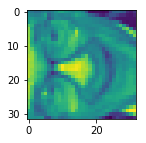

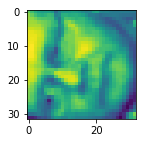

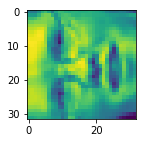

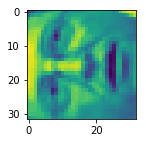

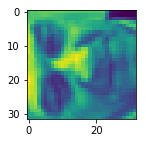

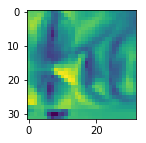

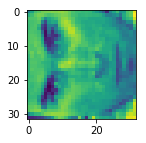

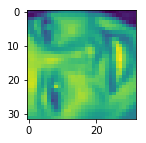

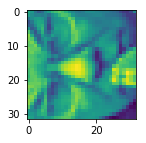

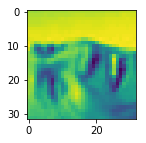

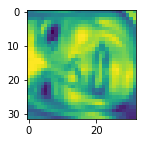

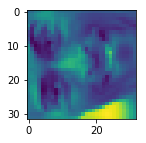

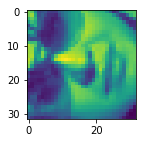

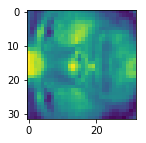

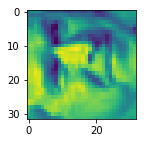

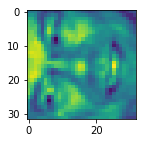

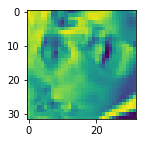

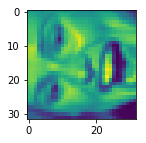

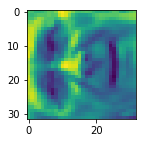

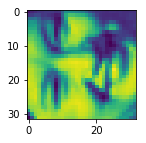

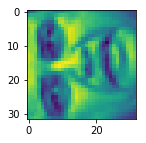

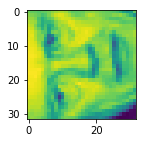

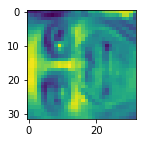

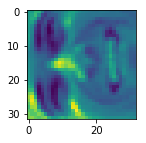

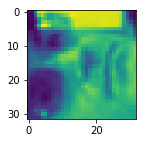

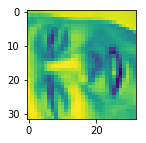

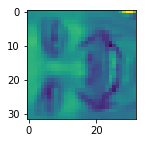

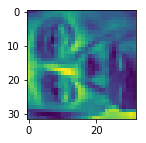

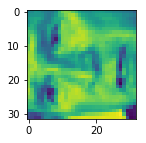

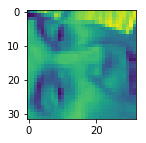

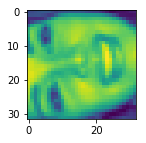

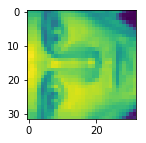

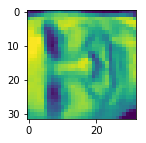

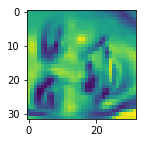

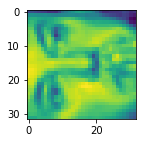

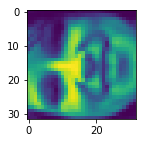

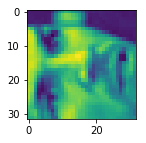

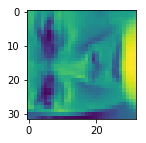

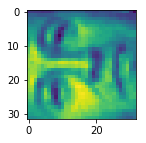

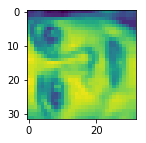

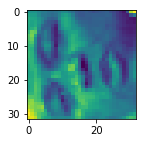

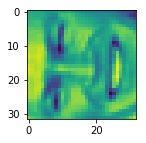

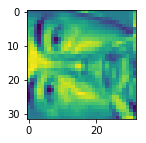

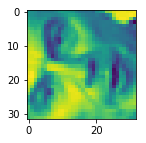

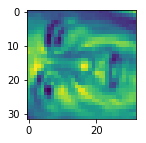

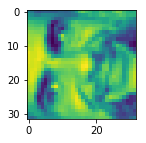

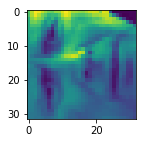

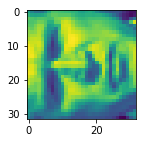

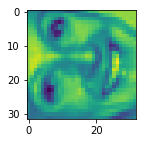

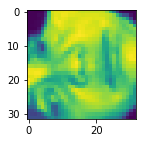

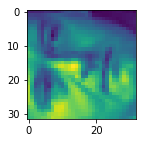

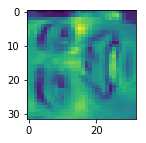

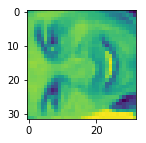

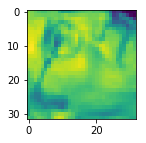

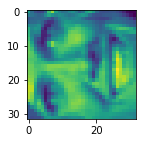

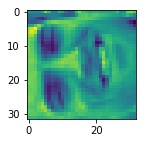

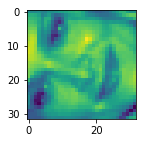

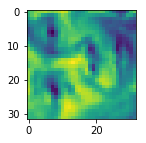

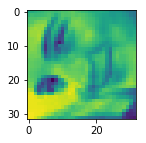

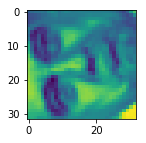

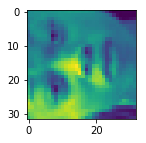

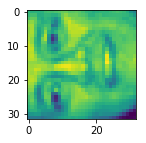

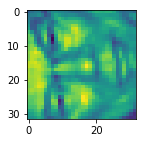

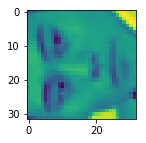

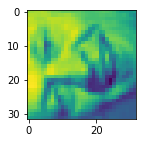

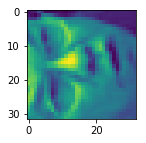

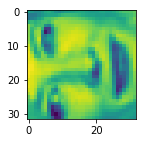

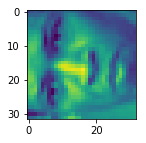

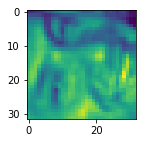

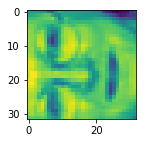

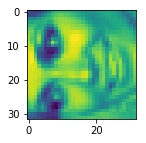

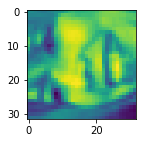

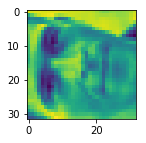

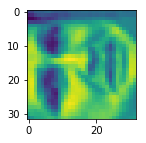

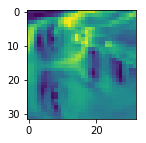

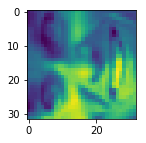

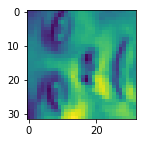

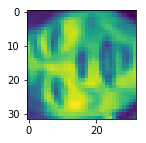

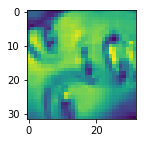

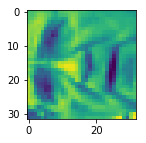

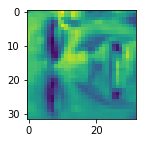

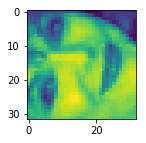

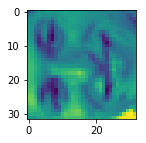

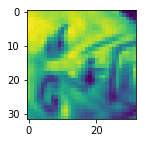

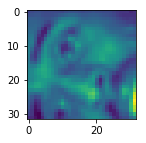

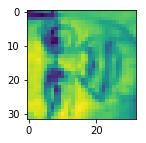

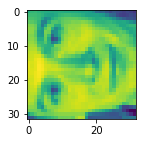

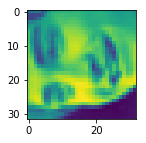

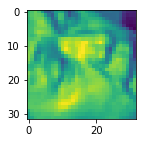

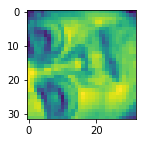

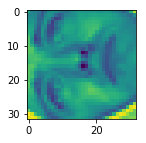

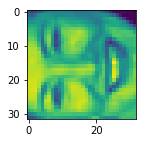

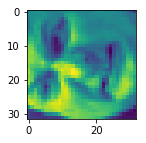

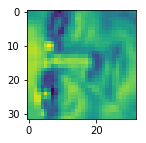

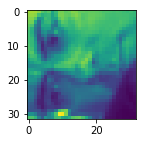

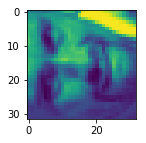

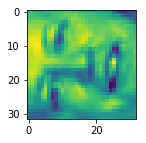

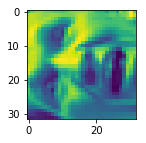

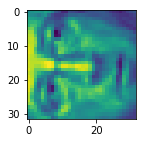

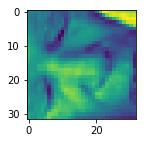

In [34]:
for i in f_x[:100,]:
    i=i.reshape((32,32))
    fig=plt.figure(figsize=(2,2))
    
    plt.imshow(i)

##### Procedure of the PCA 

In [35]:
#step:1 Feature scalling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
f_x=sc.fit_transform(f_x)

In [38]:
#step:2 Finding the covarience matrix
Face_covar=np.dot(f_x.T,f_x)/f_x.shape[0]

In [40]:
#step:3 Finding the Eigen values and Eigen vectors
face_e_val,face_e_vec=np.linalg.eig(Face_covar)

In [41]:
# Now the shape of the eigen values an deigen vectors
print("the shape of the eigen values :",face_e_val.shape)
print("the shape of the eigen vectors :",face_e_vec.shape)

the shape of the eigen values : (1024,)
the shape of the eigen vectors : (1024, 1024)


In [47]:
# displaying the eigen values
for i in face_e_val:
    print(float(i))

337.0250218267054
130.9387972573509
54.69353174805608
39.72989610779785
33.16261682885814
22.896829152965978
20.324760641072974
19.415371418805766
15.979073095571442
14.703207761354035
13.517817507459831
12.892470554172206
10.58463706387958
9.427456449771963
8.46638326859765
8.429272224951944
7.38493627987678
7.084926563067596
6.795057833707575
6.5129585591347
5.610491955563531
5.489155994087639
5.367941723603974
5.1625103844329985
5.0043486913652195
4.826102282017288
4.802951880313591
4.504735436858509
4.331302128607293
4.212084494444414
4.037047467376489
3.924542310743849
3.65536805341162
3.5407831836395167
3.469632269736502
3.2290252694878583
3.1825161616701574
3.1277762055561222
3.0627586458272464
2.9338419323487748
2.879908528729064
2.800640481462995
2.6553185184952914
2.6114552893533047
2.597588803368365
2.4938708382230668
2.4031479479507643
2.3462810427357015
2.2973213431515833
2.208741226712031
2.159296563904245
2.0591924858763084
2.0375531476466517
1.9911928429373673
1.9655809

In [53]:
# how the data can be explained on the axis  is described by using the eigen values
score=sum(face_e_val[:36])/sum(face_e_val)
print("the score i.e the information retained by the 36 dimensions is :",score)
# here 83% of information can be retained 

the score i.e the information retained by the 36 dimensions is : 0.8311846149109843


In [54]:
# here for 36 dimensions only 83 percentage of the information is retained
# For 100 dimensions of the data 93 percentage can be retained
print("the score for the 100 pricipal components is :",sum(face_e_val[:100])/sum(face_e_val))

the score for the 100 pricipal components is : 0.9319320428645937


In [65]:
# step4 : Take required components here we can take 100 principal components
U_vec=face_e_vec[:,:400]

In [66]:
# step5 :project the data in to obtained the eigen vectors
print("the shape of the obtained eigen vectors :",U_vec.shape)

the shape of the obtained eigen vectors : (1024, 400)


In [67]:
# step 5: projecting the data obtain the new features
new_features=np.dot(f_x,U_vec)

In [68]:
# the shape of the new features which consists of the 100 dimensions in the data
print("the shape of the new features :",new_features.shape)

the shape of the new features : (5000, 400)


In [69]:
# Reconstructing the data
rec_features=np.dot(new_features,U_vec.T)

/home/sai/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


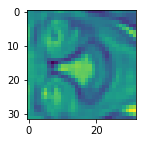

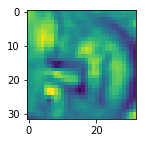

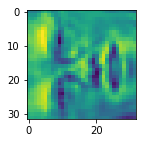

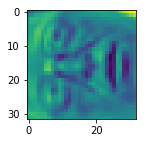

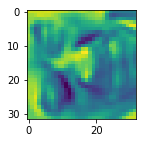

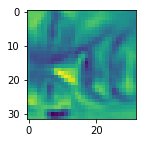

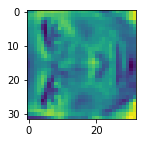

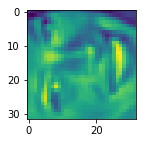

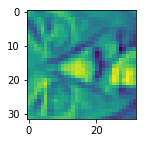

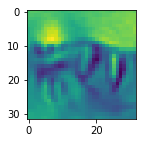

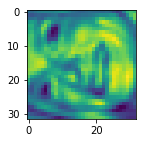

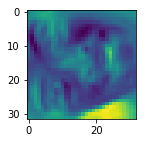

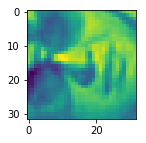

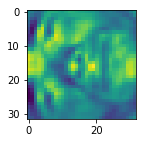

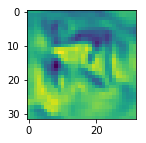

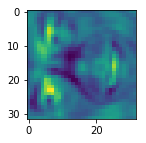

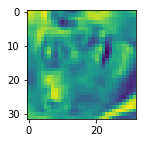

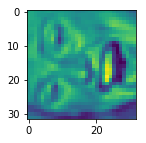

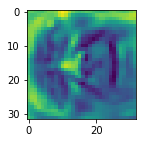

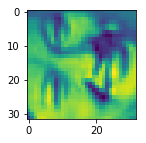

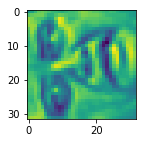

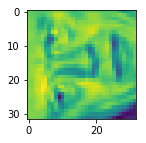

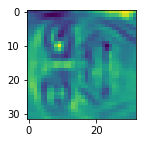

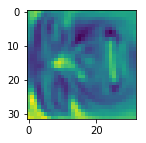

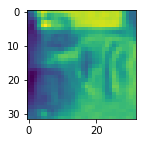

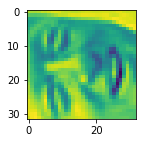

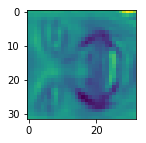

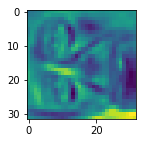

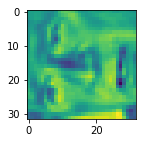

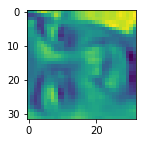

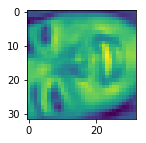

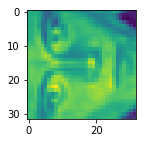

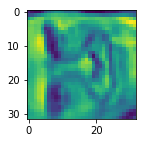

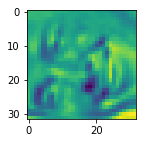

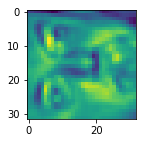

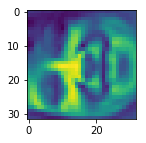

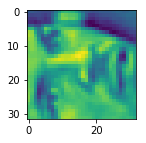

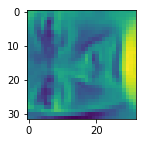

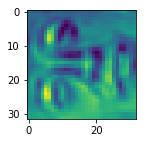

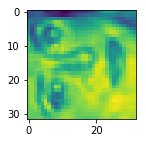

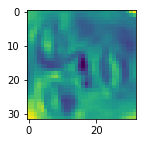

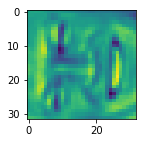

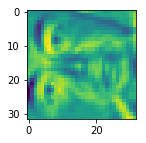

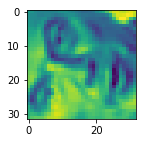

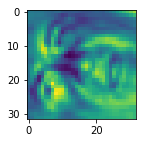

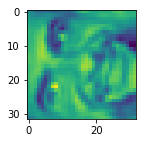

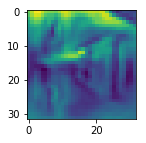

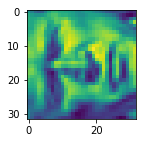

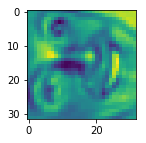

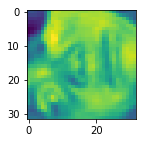

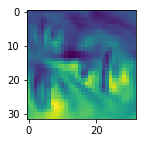

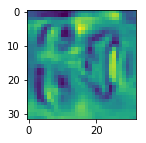

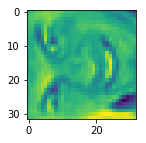

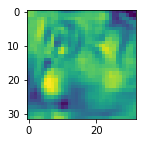

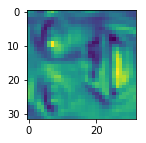

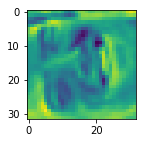

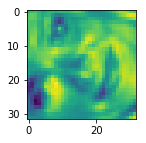

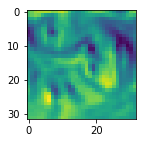

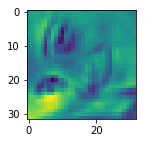

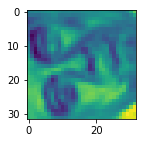

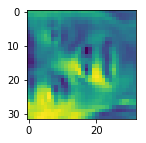

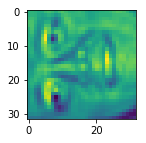

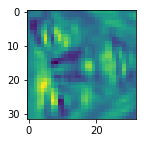

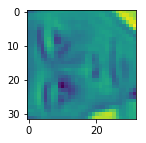

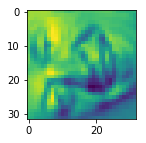

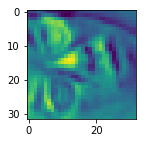

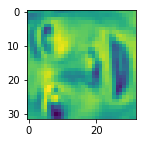

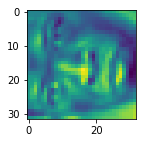

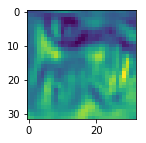

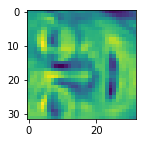

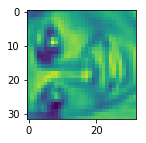

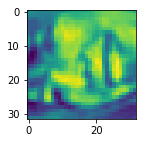

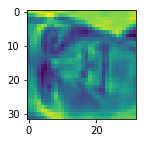

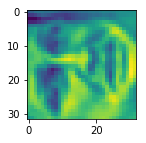

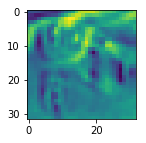

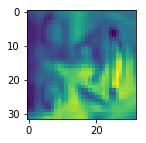

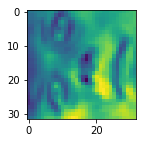

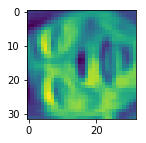

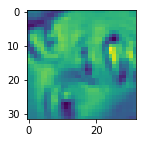

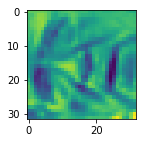

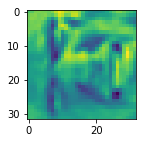

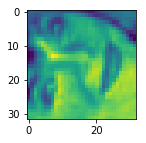

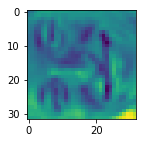

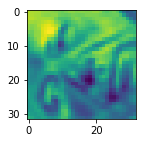

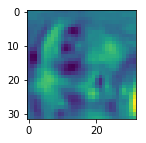

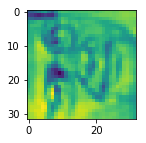

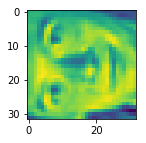

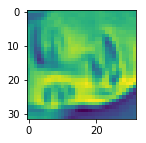

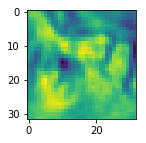

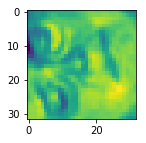

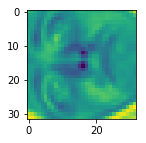

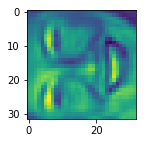

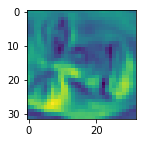

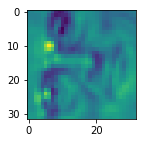

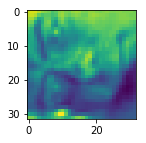

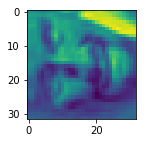

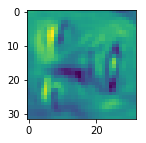

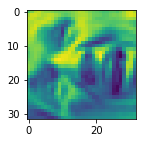

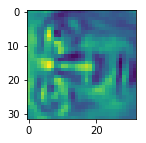

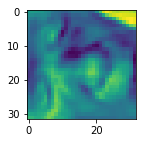

In [75]:
for i in rec_features[:100,]:
    i=i.reshape((32,32))
    fig=plt.figure(figsize=(2,2))
    
    plt.imshow(i)